In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

original_corpus = pd.read_csv('data/mental_health.csv')
cleaned_corpus = pd.read_csv('data/cleaned_mhc.csv')

print("Shape of Original Corpus", original_corpus.shape)
print("Shape of Cleaned Corpus", cleaned_corpus.shape)

Shape of Original Corpus (27977, 2)
Shape of Cleaned Corpus (23240, 2)


In [4]:
k_values = [1, 5, 10, 50, 100, 200, 300, 500, 1000, 2000, 5000, 8000]
vectorizer = TfidfVectorizer(max_features=3500)

metrics_original = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
metrics_cleaned = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}

def run_knn(corpus, target, metrics_dict, dataset_name):
    best_f1 = 0
    best_conf_matrix = None
    best_k = None
    best_test_time = None

    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(corpus, target, test_size=0.2, random_state=42)
        vectorizer = TfidfVectorizer(max_features=3500)
        
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)
       
        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(X_train_tfidf, y_train)
        
        start_test = time.perf_counter()
        y_test_pred = knn.predict(X_test_tfidf)
        test_time = time.perf_counter() - start_test
        
        y_train_pred = knn.predict(X_train_tfidf)
        
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        prec = precision_score(y_test, y_test_pred)
        rec = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        
        metrics_dict["K"].append(k)
        metrics_dict["Training Accuracy"].append(train_acc)
        metrics_dict["Test Accuracy"].append(test_acc)
        metrics_dict["Precision"].append(prec)
        metrics_dict["Recall"].append(rec)
        metrics_dict["F1"].append(f1)
        metrics_dict["Test Time (s)"].append(test_time)

        if f1 > best_f1:
            best_f1 = f1
            best_conf_matrix = confusion_matrix(y_test, y_test_pred)
            best_k = k
            best_test_time = test_time

    print(f"Best F1 Score for {dataset_name} Corpus (k={best_k}): {best_f1:.4f}, "
          f"Test time: {best_test_time:.4f} s")
    print("Confusion Matrix:\n", best_conf_matrix)

run_knn(original_corpus['text'], original_corpus['label'], metrics_original, "Original")
run_knn(cleaned_corpus['text'], cleaned_corpus['label'], metrics_cleaned, "Cleaned")

df_original = pd.DataFrame(metrics_original)
df_cleaned = pd.DataFrame(metrics_cleaned)

Best F1 Score for Original Corpus (k=200): 0.8842, Test time: 3.8274 s
Confusion Matrix:
 [[2285  517]
 [ 170 2624]]
Best F1 Score for Cleaned Corpus (k=50): 0.9030, Test time: 2.7630 s
Confusion Matrix:
 [[1712  387]
 [ 132 2417]]


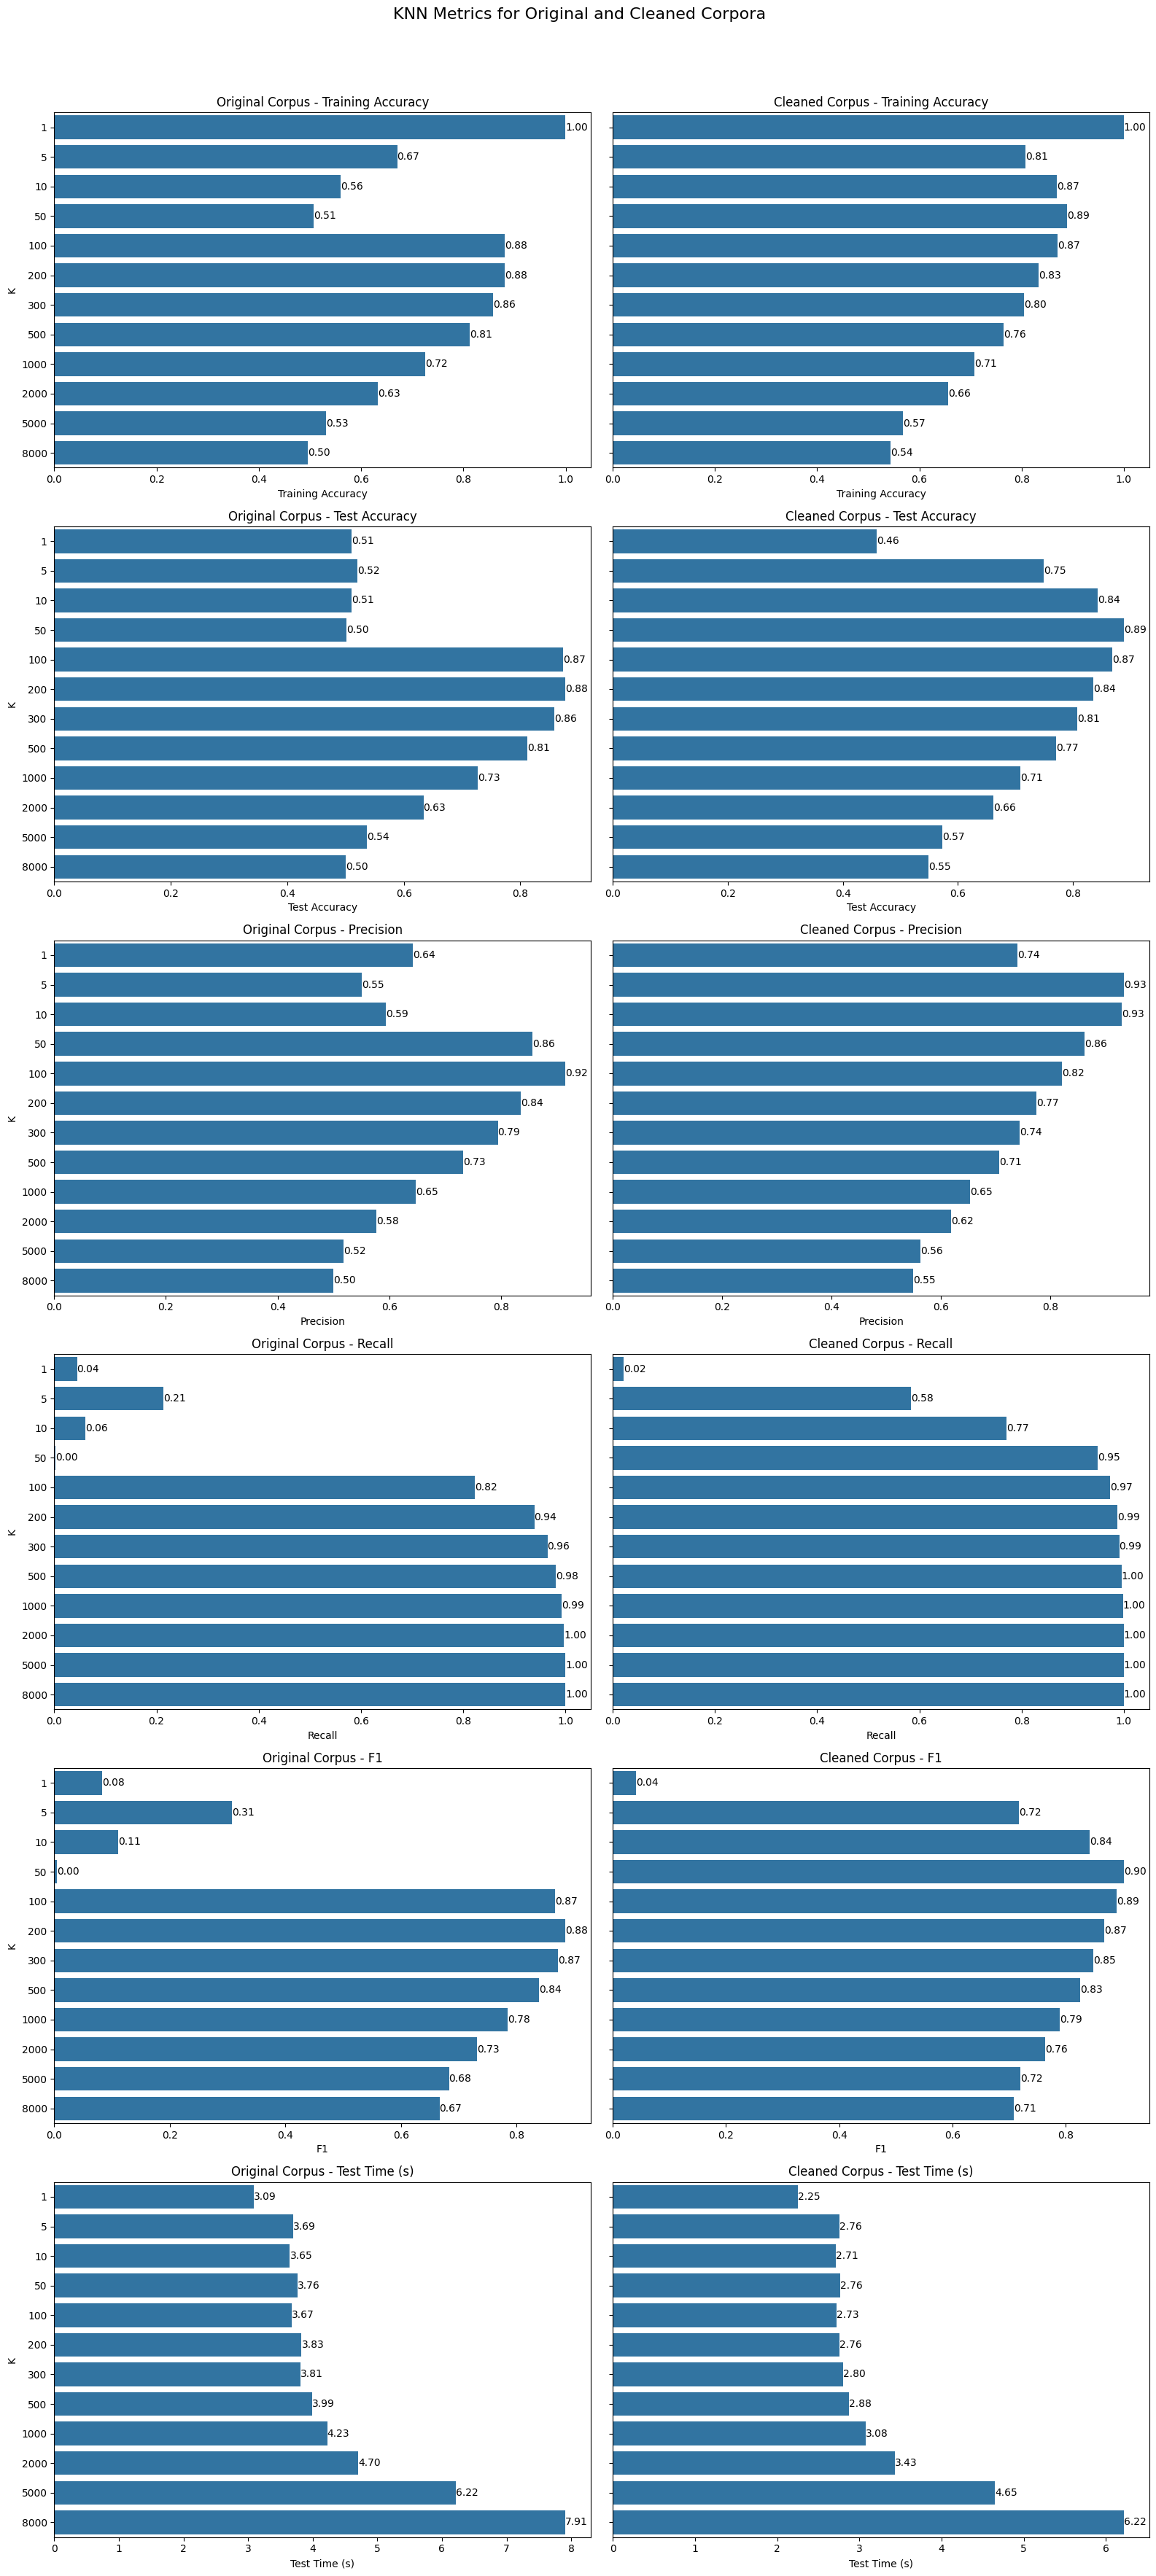

In [5]:
metrics_to_plot = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "Test Time (s)"]

fig, axes = plt.subplots(len(metrics_to_plot), 2, figsize=(16, 36), sharey=True)
fig.suptitle("KNN Metrics for Original and Cleaned Corpora", fontsize=16)

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(ax=axes[i, 0], y="K", x=metric, data=df_original, orient='h')
    axes[i, 0].set_title(f"Original Corpus - {metric}")
    axes[i, 0].bar_label(axes[i, 0].containers[0], fmt='%.2f', label_type='edge')

    sns.barplot(ax=axes[i, 1], y="K", x=metric, data=df_cleaned, orient='h')
    axes[i, 1].set_title(f"Cleaned Corpus - {metric}")
    axes[i, 1].bar_label(axes[i, 1].containers[0], fmt='%.2f', label_type='edge')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [3]:
k_values = [1, 5, 10, 50, 100, 200, 300, 500, 1000, 2000, 5000, 8000]
vectorizer = TfidfVectorizer(max_features=3500)

metrics_original = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}
metrics_cleaned = {"K": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Test Time (s)": []}

def run_knn(corpus, target, metrics_dict, dataset_name):
    best_f1 = 0
    best_conf_matrix = None
    best_k = None
    best_test_time = None

    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(corpus, target, test_size=0.2, random_state=42)
        vectorizer = TfidfVectorizer(max_features=3500)
        
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)
       
        knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')

        knn.fit(X_train_tfidf, y_train)
        
        start_test = time.perf_counter()
        y_test_pred = knn.predict(X_test_tfidf)
        test_time = time.perf_counter() - start_test
        
        y_train_pred = knn.predict(X_train_tfidf)
        
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        prec = precision_score(y_test, y_test_pred)
        rec = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        
        metrics_dict["K"].append(k)
        metrics_dict["Training Accuracy"].append(train_acc)
        metrics_dict["Test Accuracy"].append(test_acc)
        metrics_dict["Precision"].append(prec)
        metrics_dict["Recall"].append(rec)
        metrics_dict["F1"].append(f1)
        metrics_dict["Test Time (s)"].append(test_time)

        if f1 > best_f1:
            best_f1 = f1
            best_conf_matrix = confusion_matrix(y_test, y_test_pred)
            best_k = k
            best_test_time = test_time

    print(f"Best F1 Score for {dataset_name} Corpus (k={best_k}): {best_f1:.4f}, "
          f"Test time: {best_test_time:.4f} s")
    print("Confusion Matrix:\n", best_conf_matrix)

run_knn(original_corpus['text'], original_corpus['label'], metrics_original, "Original")
run_knn(cleaned_corpus['text'], cleaned_corpus['label'], metrics_cleaned, "Cleaned")

df_original = pd.DataFrame(metrics_original)
df_cleaned = pd.DataFrame(metrics_cleaned)

Best F1 Score for Original Corpus (k=50): 0.8868, Test time: 3.9941 s
Confusion Matrix:
 [[2390  412]
 [ 240 2554]]
Best F1 Score for Cleaned Corpus (k=50): 0.8993, Test time: 2.7137 s
Confusion Matrix:
 [[1664  435]
 [ 111 2438]]


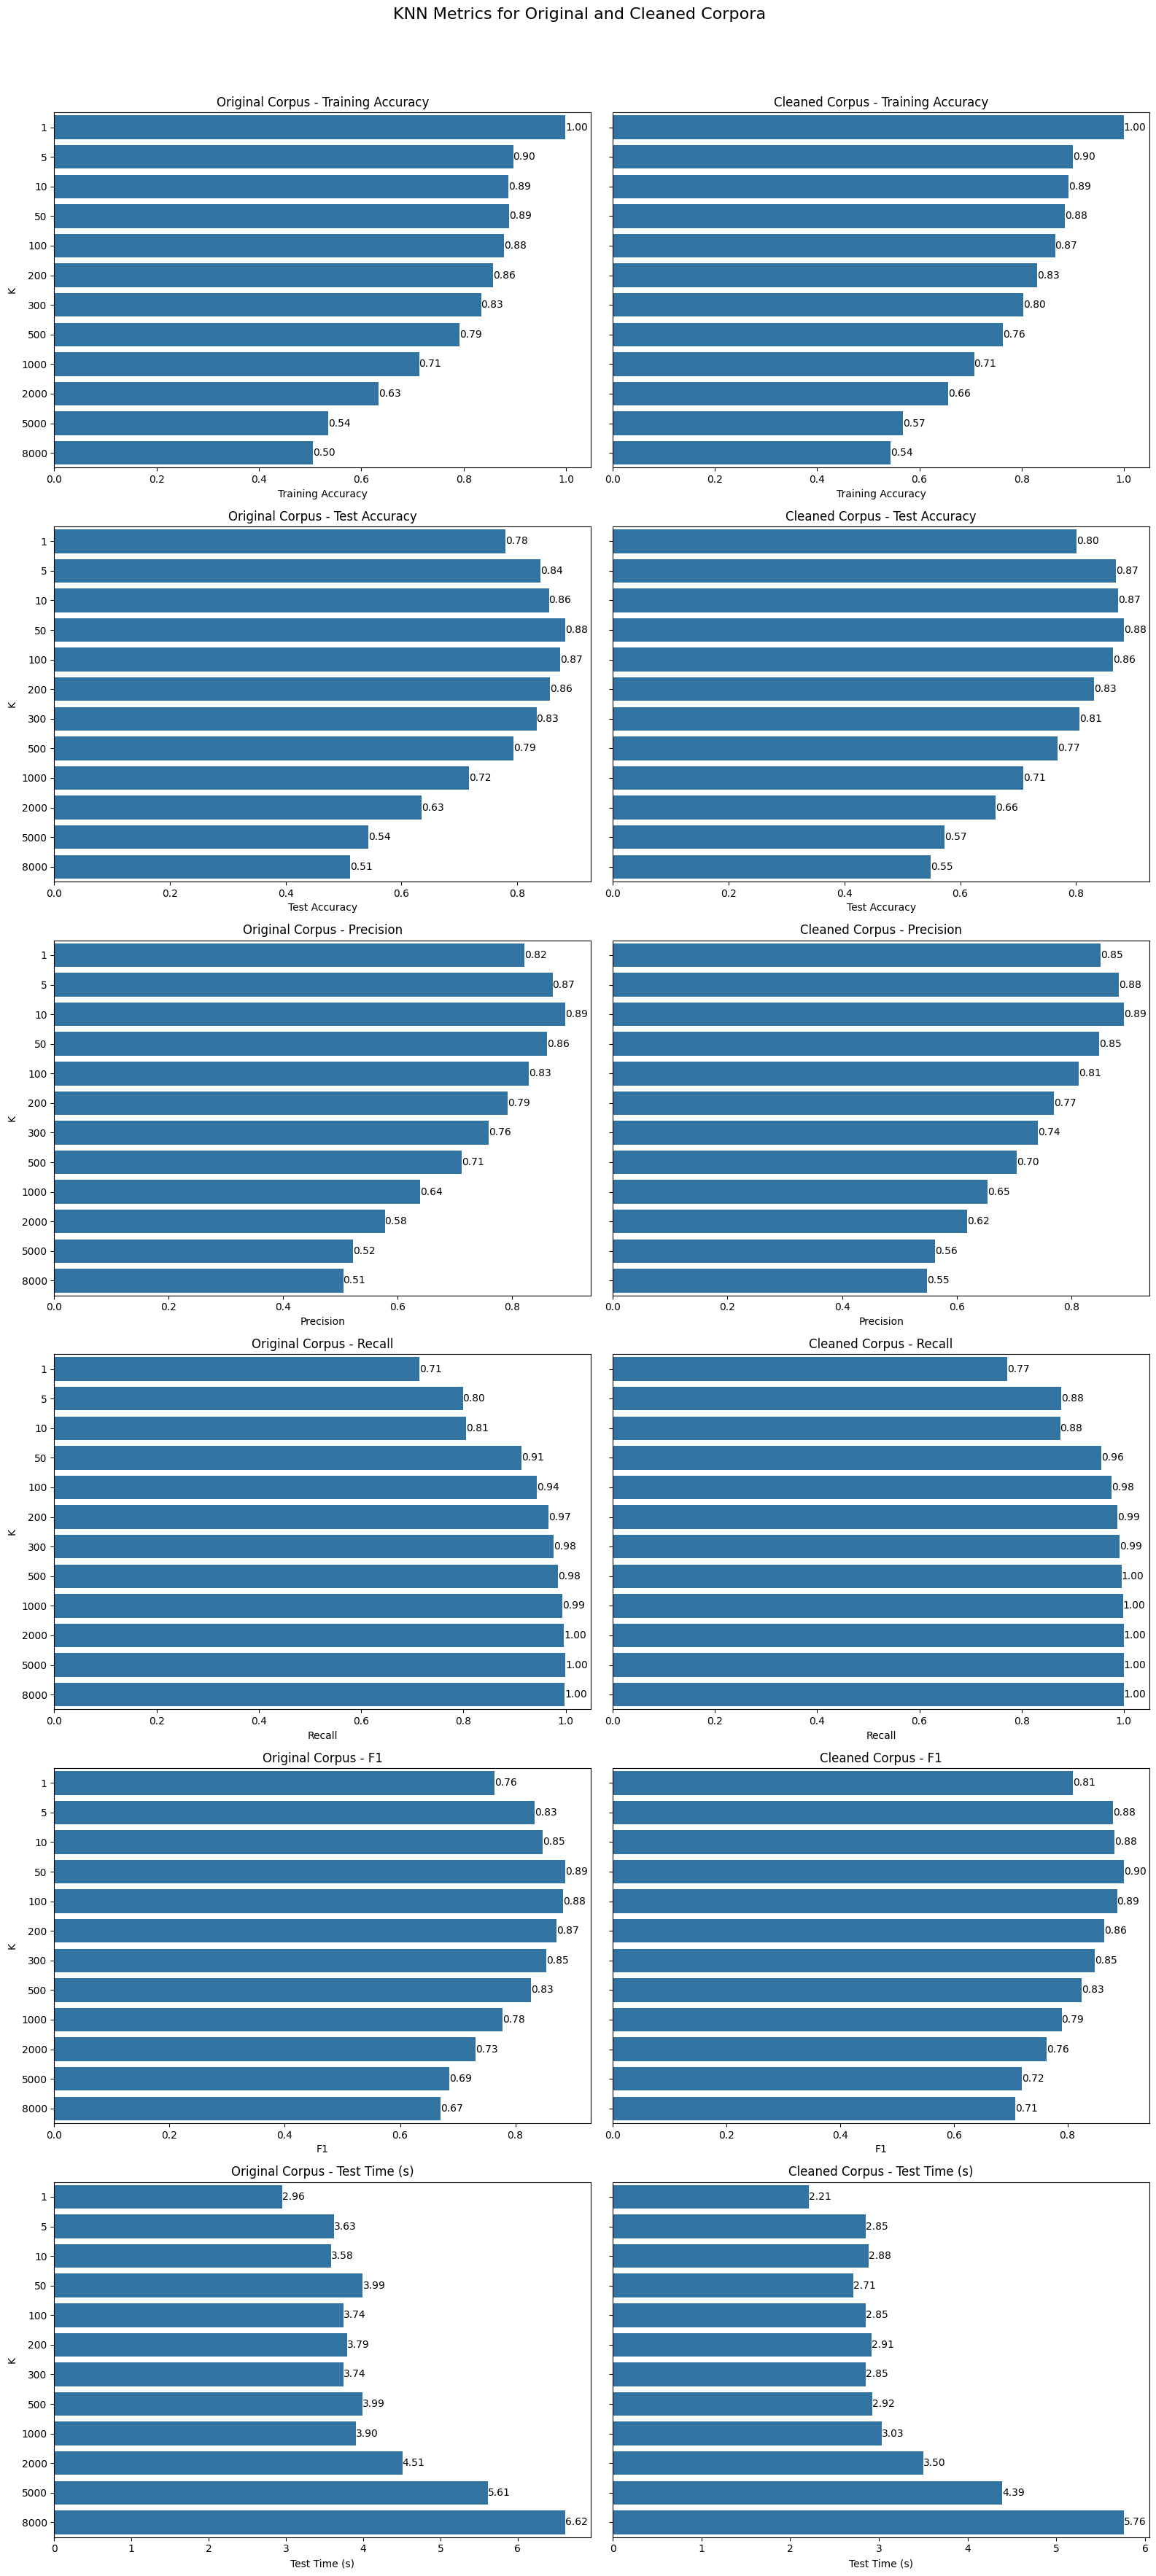

In [4]:
metrics_to_plot = ["Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "Test Time (s)"]

fig, axes = plt.subplots(len(metrics_to_plot), 2, figsize=(16, 36), sharey=True)
fig.suptitle("KNN Metrics for Original and Cleaned Corpora", fontsize=16)

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(ax=axes[i, 0], y="K", x=metric, data=df_original, orient='h')
    axes[i, 0].set_title(f"Original Corpus - {metric}")
    axes[i, 0].bar_label(axes[i, 0].containers[0], fmt='%.2f', label_type='edge')

    sns.barplot(ax=axes[i, 1], y="K", x=metric, data=df_cleaned, orient='h')
    axes[i, 1].set_title(f"Cleaned Corpus - {metric}")
    axes[i, 1].bar_label(axes[i, 1].containers[0], fmt='%.2f', label_type='edge')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()